<a href="https://colab.research.google.com/github/ddojaewon/Python-Study/blob/main/Titanic_JW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **▶ 라이브러리 생성**




In [ ]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## **▶ 데이터 생성**

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

## **▶ 데이터 탐색**

### ▷ 데이터 속성 탐색

In [ ]:
#column 살펴보기

print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
#결측치 살펴보기

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## **▶ 칼럼 탐색**

### ▷ 칼럼-생존율 간의 bar chart

In [ ]:
# bar chart 함수

def bar_chart(feature):
  survived = train_df[train_df['Survived']==1][feature].value_counts()
  dead = train_df[train_df['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived','Dead']
  df.plot(kind='bar',stacked=True, figsize=(10,5))

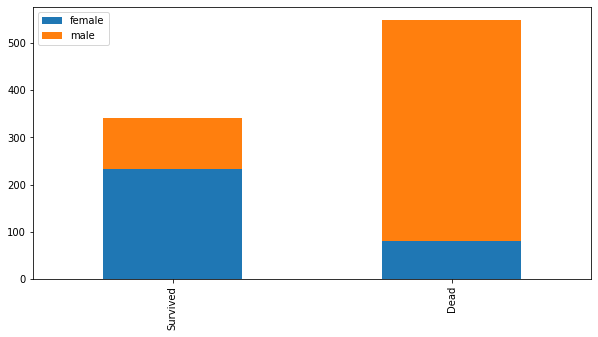

In [ ]:
# 'Sex' 칼럼 bar chart

bar_chart('Sex')

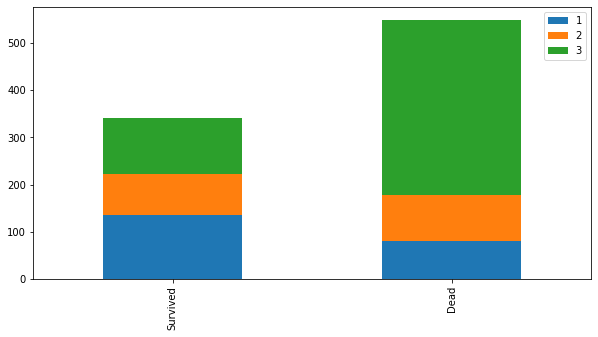

In [ ]:
# 'Pclass' 칼럼 bar chart

bar_chart('Pclass')

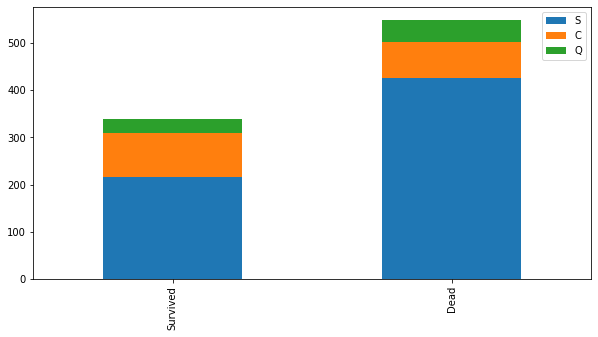

In [ ]:
# 'Embarked' 칼럼 bar chart

bar_chart('Embarked')

###▷ 칼럼-생존율 간의 facetgrid

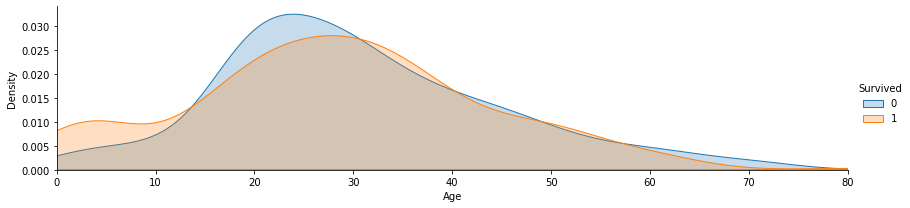

In [ ]:
# 'Age' 칼럼 facetgrid

facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()

plt.show()

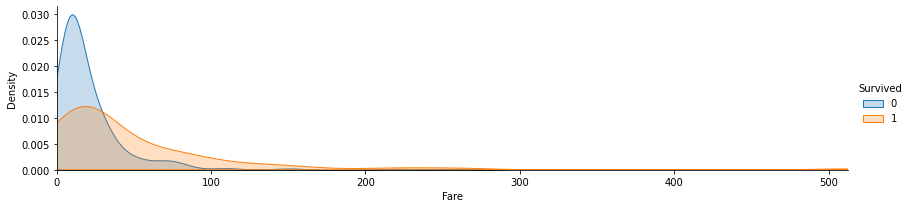

In [ ]:
# 'fare' 칼럼 facetgrid

facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0, train_df['Fare'].max()))
facet.add_legend()

plt.show()

## **▶ 데이터 전처리**

### ▷ 불필요한 열 제거

In [ ]:
# Ticket, Cabin 제거

train_df = train_df.drop(['Ticket','Cabin'], axis=1)
test_df = test_df.drop(['Ticket','Cabin'], axis=1)
combine = [train_df, test_df]

### ▷ Title 열 생성

In [ ]:
# 'Name' 열로부터 성 추출

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
# 'Title' 열 정리

for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col',\
                                               'Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')

  dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
  dataset['Title'] = dataset['Title'].replace('Ms','Miss')
  dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
  
train_df[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [ ]:
# 'Title' 열 mapping

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Rare":4}
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


In [ ]:
train_df['Title'].isnull().sum()

0

In [ ]:
# 'Name', 'PassengerId' 열 제거

train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

###▷ Title 칼럼 bar chart

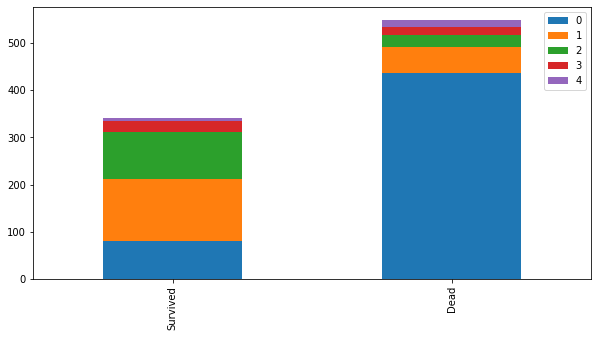

In [ ]:
bar_chart('Title')

### ▷ Sex 열 처리

In [ ]:
# 'Sex' 열 mapping

for dataset in combine:
  dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

### ▷ Age 열 처리

In [ ]:
# 'Age' 열의 결측치들을 'Title' 별 평균값으로 대체

train_df["Age"].fillna(train_df.groupby("Title")["Age"].transform("median"), inplace=True)
test_df["Age"].fillna(test_df.groupby("Title")["Age"].transform("median"), inplace=True)
combine = [train_df, test_df]

In [ ]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [ ]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          0
dtype: int64

In [ ]:
# 'Age' 열을 5개의 구간으로 분할

train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.548077
1,"(16.336, 32.252]",0.327345
2,"(32.252, 48.168]",0.439024
3,"(48.168, 64.084]",0.428571
4,"(64.084, 80.0]",0.090909


In [ ]:
# 'Age' 열의 5개 구간 mapping

for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1.0,1,0,7.2500,S,0,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,71.2833,C,2,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,7.9250,S,1,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,53.1000,S,2,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,8.0500,S,0,"(32.252, 48.168]"


In [ ]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,S,0
1,1,1,1,2.0,1,0,71.2833,C,2
2,1,3,1,1.0,0,0,7.9250,S,1
3,1,1,1,2.0,1,0,53.1000,S,2
4,0,3,0,2.0,0,0,8.0500,S,0


### ▷ FamilySize 열 생성

In [ ]:
# 'FamilySize' = 'SibSp' + 'Parch' + 1

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,0,1.0,1,0,7.2500,S,0,2
1,1,1,1,2.0,1,0,71.2833,C,2,2
2,1,3,1,1.0,0,0,7.9250,S,1,1
3,1,1,1,2.0,1,0,53.1000,S,2,2
4,0,3,0,2.0,0,0,8.0500,S,0,1


In [ ]:
# 'FamilySize' 열 mapping

family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
for dataset in combine:
  dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,0,1.0,1,0,7.2500,S,0,0.4
1,1,1,1,2.0,1,0,71.2833,C,2,0.4
2,1,3,1,1.0,0,0,7.9250,S,1,0.0
3,1,1,1,2.0,1,0,53.1000,S,2,0.4
4,0,3,0,2.0,0,0,8.0500,S,0,0.0


In [ ]:
# 'Parch', 'SibSp' 열 제거

train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1.0,7.2500,S,0,0.4
1,1,1,1,2.0,71.2833,C,2,0.4
2,1,3,1,1.0,7.9250,S,1,0.0
3,1,1,1,2.0,53.1000,S,2,0.4
4,0,3,0,2.0,8.0500,S,0,0.0


###▷ FamilySize 칼럼 facetgrid

(0.0, 4.0)

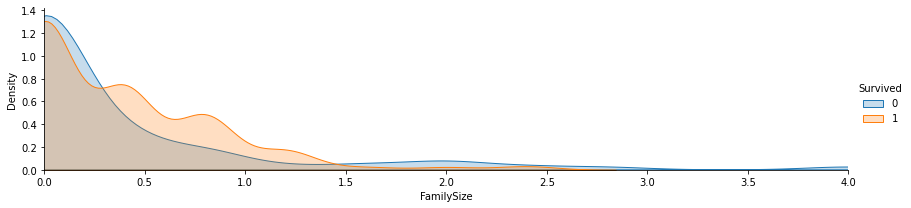

In [ ]:
facet = sns.FacetGrid(train_df, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade=True)
facet.set(xlim=(0, train_df['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

###▷ Embarked 열 처리

In [ ]:
# 'Embarked' 열 결측치 처리

freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [ ]:
# 'Embarked' 열 mapping

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1.0,7.2500,0,0,0.4
1,1,1,1,2.0,71.2833,1,2,0.4
2,1,3,1,1.0,7.9250,0,1,0.0
3,1,1,1,2.0,53.1000,0,2,0.4
4,0,3,0,2.0,8.0500,0,0,0.0


###▷ Fare 열 처리

In [ ]:
train_df['Fare'].isnull().sum()

0

In [ ]:
# 'Fare' 열 결측치들을 'Pclass' 그룹별 평균값으로 대체

train_df["Fare"].fillna(train_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_df["Fare"].fillna(test_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [ ]:
# 'Fare' 열 4개의 그룹으로 분할

train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [ ]:
# 'Fare' 열 그룹별 mapping

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1.0,0,0,0,0.4
1,1,1,1,2.0,3,1,2,0.4
2,1,3,1,1.0,1,0,1,0.0
3,1,1,1,2.0,3,0,2,0.4
4,0,3,0,2.0,1,0,0,0.0
5,0,3,0,1.0,1,2,0,0.0
6,0,1,0,3.0,3,0,0,0.0
7,0,3,0,0.0,2,0,3,1.6
8,1,3,1,1.0,1,0,2,0.8
9,1,2,1,0.0,2,1,2,0.4


## **▶ 최종 데이터**

In [ ]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,892,3,0,2.0,0,2,0,0.0
1,893,3,1,2.0,0,0,2,0.4
2,894,2,0,3.0,1,2,0,0.0
3,895,3,0,1.0,1,0,0,0.0
4,896,3,1,1.0,1,0,2,0.8
5,897,3,0,0.0,1,0,0,0.0
6,898,3,1,1.0,0,2,1,0.0
7,899,2,0,1.0,2,0,0,0.8
8,900,3,1,1.0,0,1,2,0.0
9,901,3,0,1.0,2,0,0,0.8


### ▷ 활용 데이터 생성

In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

## **▶ 최적 기법 탐색**

### ▷ Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.8

In [ ]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.187000
5,Title,0.485955
3,Fare,0.281110
4,Embarked,0.276067
2,Age,-0.034670
0,Pclass,-0.689702
6,FamilySize,-0.751616


In [ ]:
coeff_df

,Feature,Correlation
0,Pclass,-0.689702
1,Sex,2.187000
2,Age,-0.034670
3,Fare,0.281110
4,Embarked,0.276067
5,Title,0.485955
6,FamilySize,-0.751616


### ▷ Support Vector Machine

In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

80.92

### ▷ KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.42

###▷ Naive Bayes

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.34

### ▷ Perceptron

In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

74.52

###▷ Linear SVC

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


80.13

###▷ Stochastic Gradient Descent

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.56

###▷ Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

89.11

###▷ Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.11

###▷ 모델 별 정확도 점수

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.11
8,Decision Tree,89.11
1,KNN,86.42
0,Support Vector Machines,80.92
7,Linear SVC,80.13
2,Logistic Regression,79.80
6,Stochastic Gradient Decent,78.56
4,Naive Bayes,78.34
5,Perceptron,74.52


###**Random Forest, Decision Tree가 정확도 점수 89.11 점으로 가장 높음.**

## **▶ Random Forest를 사용하여 Test 데이터 예측**

In [ ]:
submission_JW = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [ ]:
submission_JW

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
dataframe = pd.DataFrame(submission_JW)
dataframe.to_csv("Titanic_JW", header=True, index=False)